In [98]:
#!pip install colour
import cv2
import time
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [99]:
'''Defination of the functions to get the resolution'''
def Get_Resolutions(img):
    wid = img.shape[1]
    hgt = img.shape[0]
    
    print(str(wid) + "x" + str(hgt))

In [100]:
from colour import Color
def hex_to_color(colour):
    names=[]
    for a in colour:
        names.append(Color(a))
        
    return names
    

In [101]:
def show_dominant_colors_frequency(arr, len_of_pixels, count):
    
    color_deck = np.zeros((50, 300, 3), dtype= np.uint8)
    no_of_pixels = len_of_pixels
    percentage = {}
    for i in count:
        percentage[i] = np.round((count[i] / no_of_pixels), 2)
    
    percentage = dict(sorted(percentage.items()))
    print(percentage)
    
    steps = 0
    for idx, ele in enumerate(arr):  #generating the colour deck from 0 to 300 and arranged by thier frequency of occurence
        color_deck[:, steps:int(steps+ percentage[idx]*300+1), :] = ele
        steps += int(percentage[idx]*300+1)
    
    return color_deck

In [102]:
def get_Colors(img):
    
    fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    cluster = KMeans(n_clusters=5)
    cluster.fit(fix_img.reshape(-1,3))
    
    count = Counter(cluster.labels_)
    arr = cluster.cluster_centers_
    
    final_hex_color_list = []
    for lst in arr:
        round_value = []
        for value in lst:
            round_value.append(round(value))
        final_hex_color_list.append(rgb_to_hex(round_value))
    
    print(final_hex_color_list)
    hex_to_color(final_hex_color_list)
    
    
    len_of_pixels = len(cluster.labels_)
    f = plt.figure(figsize=(10,7))
    f.add_subplot(1,2, 1)
    plt.imshow(fix_img)
    f.add_subplot(1,2, 2)
    plt.imshow(show_dominant_colors_frequency(arr, len(cluster.labels_), count))
    plt.show(block=True)

In [103]:
#!pip install webcolors
# import webcolors

# def closest_colour(requested_colour):
#     min_colours = {}
#     for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
#         r_c, g_c, b_c = webcolors.hex_to_rgb(key)
#         rd = (r_c - requested_colour[0]) ** 2
#         gd = (g_c - requested_colour[1]) ** 2
#         bd = (b_c - requested_colour[2]) ** 2
#         min_colours[(rd + gd + bd)] = name
#     return min_colours[min(min_colours.keys())]

In [104]:
# def get_colour_name(requested_colour):
#     try:
#         closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
#     except ValueError:
#         closest_name = closest_colour(requested_colour)
#     return closest_name

In [105]:
def rgb_to_hex(rgb):
  return '#%s' % ''.join(('%02x' % p for p in rgb))

In [106]:
import os

In [107]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [108]:
images = load_images_from_folder('E:\dominant colour extraction\dominant_color_extraction-master\dataset')

['#495668', '#aab2b7', '#858e94', '#e7f2f4', '#2a313a']
{0: 0.15, 1: 0.21, 2: 0.29, 3: 0.13, 4: 0.22}


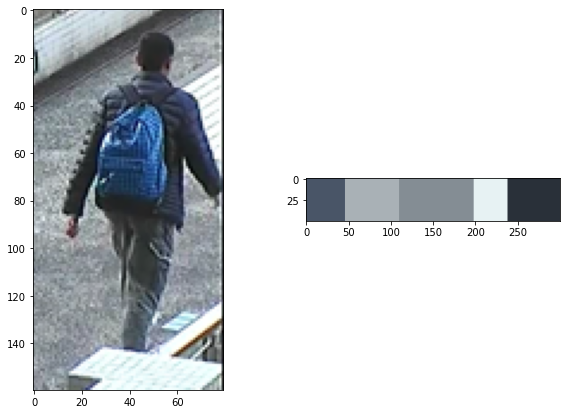

80x160
The Total time needed for executing this particular image is 0.7076153755187988




['#282929', '#949b9b', '#4d5151', '#bec9cf', '#777d7a']
{0: 0.2, 1: 0.26, 2: 0.2, 3: 0.09, 4: 0.25}


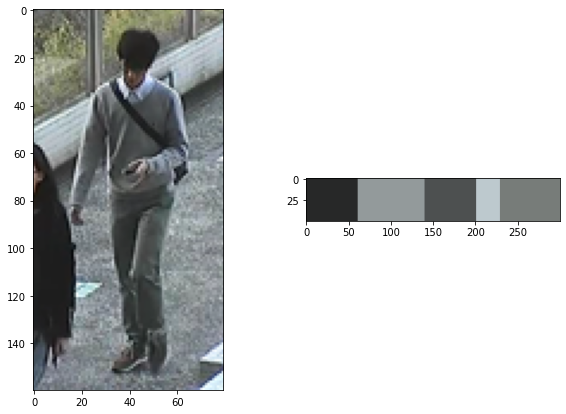

80x160
The Total time needed for executing this particular image is 0.7415738105773926




['#7a8084', '#242526', '#9da5a9', '#54595c', '#cddce4']
{0: 0.32, 1: 0.26, 2: 0.2, 3: 0.15, 4: 0.07}


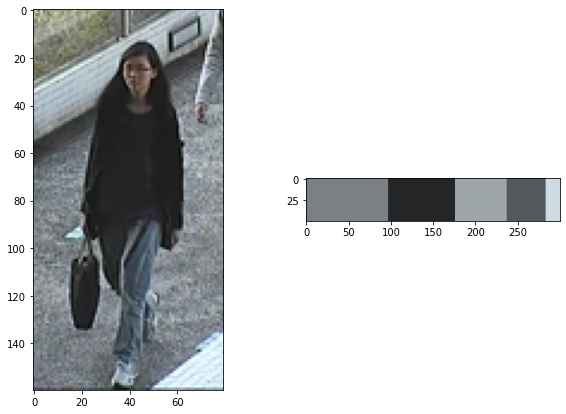

80x160
The Total time needed for executing this particular image is 0.7275824546813965




['#675d52', '#ebe9db', '#332b2a', '#88847e', '#bbad9f']
{0: 0.21, 1: 0.06, 2: 0.3, 3: 0.25, 4: 0.18}


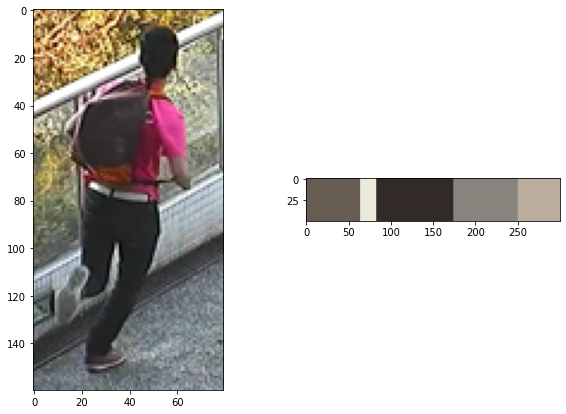

80x160
The Total time needed for executing this particular image is 0.9744207859039307




['#404447', '#90999e', '#212426', '#6f777b', '#b7c2c8']
{0: 0.13, 1: 0.22, 2: 0.38, 3: 0.17, 4: 0.1}


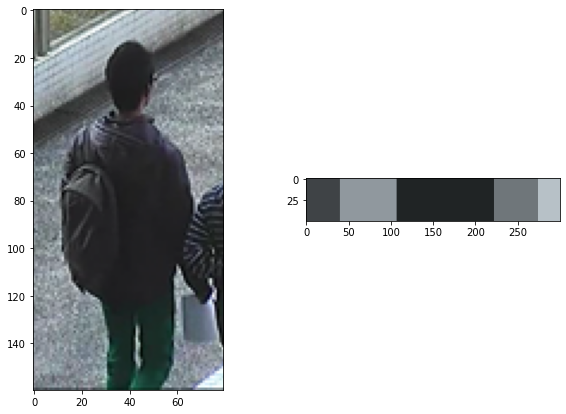

80x160
The Total time needed for executing this particular image is 1.0364058017730713






In [109]:
for img in images[:10]:
    start = time.time()
    get_Colors(img)
    end = time.time()
    Get_Resolutions(img)
    print("The Total time needed for executing this particular image is",end - start)
    print('\n')
    print("=====================================================================================")
    print('\n')
    
    
    

In [111]:
from colour import Color
c=Color("#90999e")
print(c)

#90999e


ERROR: Could not find a version that satisfies the requirement ntc.js
ERROR: No matching distribution found for ntc.js


In [117]:
import matplotlib
print(matplotlib.colors.cnames["blue"]

AttributeError: module 'matplotlib.colors' has no attribute 'knames'